In [1]:
import numpy as np
import pandas as pd 
import os

print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['shipsnet.json', 'shipsnet', 'scenes']


In [2]:
df = pd.read_json('../input/shipsnet.json')
df.head()

,data,labels,locations,scene_ids
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007


In [3]:
type(df['data'][0])

list

In [4]:
img_rows=80
img_cols=80
img_channels=3

 The first 6400 entries contain the red channel values, the next 6400 the green, and the final 6400 the blue. 

In [5]:
x=[]
for image in df['data']:
    image=np.array(image)
    image=image.reshape((3, 6400)).T.reshape((80,80,3))
    x.append(image)
x=np.array(x)
y=np.array(df['labels'])

In [6]:
image_shape=(80,80,3)

In [7]:
print(x.shape)
print(y.shape)

(4000, 80, 80, 3)
(4000,)


# Data Visualisation

In [8]:
#creating a list of random indices from the training dataset
from random import sample
plot_num_images=6
num_imgs=x.shape[0]
indices=sample(range(0,num_imgs+1),plot_num_images)
indices

[2233, 237, 1689, 2838, 2362, 800]

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 

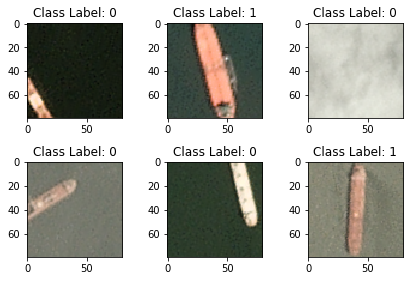

In [10]:
i=0
for index in indices:
    plt.subplot(2,3,i+1)
    img=x[index]
    plt.imshow(img,cmap="hot")
    class_label=y[index]
    plt.title('Class Label: {}'.format(class_label))
    i+=1
plt.tight_layout()
plt.show()

# Data Splitting

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [13]:
x_train.shape

(2800, 80, 80, 3)

# Data Normalisation

In [14]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [15]:
x_train/=255.0
x_test/=255.0

# One Hot Encoding

In [17]:
num_classes=2

In [18]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# Model Fitting

In [16]:
#Using Keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dense, Dropout

Using TensorFlow backend.


# Using Adam as optimizer

In [19]:
#create model
model=Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=image_shape))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation='softmax'))

#compile model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#fit the model
history= model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10,batch_size=32,verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 2800 samples, validate on 1200 samples
Epoch 1/10
2800/2800 [==============================] - 215s 77ms/step - loss: 3.9971 - acc: 0.7479 - val_loss: 4.0698 - val_acc: 0.7475
Epoch 2/10
2800/2800 [==============================] - 207s 74ms/step - loss: 4.0123 - acc: 0.7511 - val_loss: 4.0698 - val_acc: 0.7475
Epoch 3/10
2800/2800 [==============================] - 208s 74ms/step - loss: 4.0123 - acc: 0.7511 - val_loss: 4.0698 - val_acc: 0.7475
Epoch 4/10
2800/2800 [==============================] - 209s 75ms/step - loss: 4.0123 - acc: 0.7511 - val_loss: 4.0698 - val_acc: 0.7475
Epoch 5/10
2800/2800 [==============================] - 209s 75ms/step - loss: 4.0123 - acc: 0.7511 - val_loss: 4.0698 - val_acc: 0.7475
Epoch 6/10
2800/2800 [==========

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 78, 78, 64)        1792      
_________________________________________________________________
dropout_1 (Dropout)          (None, 78, 78, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 76, 76, 64)        36928     
_________________________________________________________________
dropout_2 (Dropout)          (None, 76, 76, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 74, 74, 64)        36928     
_________________________________________________________________
dropout_3 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 350464)            0         
__________

In [21]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


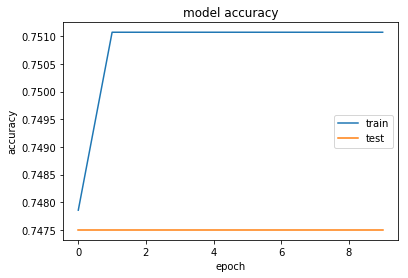

In [22]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

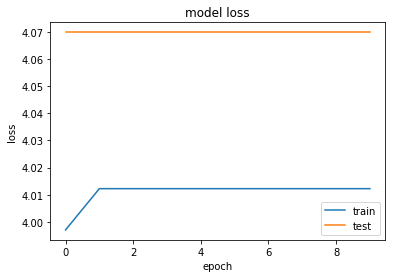

In [23]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# Using SGD as Optimizer

In [24]:
#create model
model=Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=image_shape))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation='softmax'))

#compile model
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

#fit the model
history= model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10,batch_size=32,verbose=1)

Train on 2800 samples, validate on 1200 samples
Epoch 1/10
2800/2800 [==============================] - 195s 70ms/step - loss: 0.4621 - acc: 0.8104 - val_loss: 0.3418 - val_acc: 0.8742
Epoch 2/10
2800/2800 [==============================] - 197s 70ms/step - loss: 0.2914 - acc: 0.8746 - val_loss: 0.3042 - val_acc: 0.8758
Epoch 3/10
2800/2800 [==============================] - 199s 71ms/step - loss: 0.2374 - acc: 0.9007 - val_loss: 0.2148 - val_acc: 0.9083
Epoch 4/10
2800/2800 [==============================] - 201s 72ms/step - loss: 0.2061 - acc: 0.9139 - val_loss: 0.1762 - val_acc: 0.9283
Epoch 5/10
2800/2800 [==============================] - 199s 71ms/step - loss: 0.1931 - acc: 0.9214 - val_loss: 0.1789 - val_acc: 0.9367
Epoch 6/10
2800/2800 [==============================] - 199s 71ms/step - loss: 0.1861 - acc: 0.9257 - val_loss: 0.1711 - val_acc: 0.9325
Epoch 7/10
2800/2800 [==============================] - 196s 70ms/step - loss: 0.1628 - acc: 0.9357 - val_loss: 0.1520 - val_acc: 

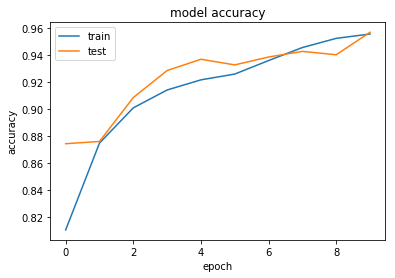

In [25]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

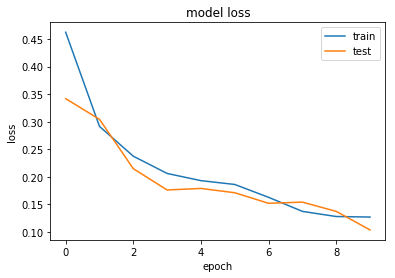

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()